# PROYECTO INTEGRADO PARA LA TIENDA ONLINE ICE

Dentro del presete proyecto se analizarán los videojuegos que la tienda online Ice vende por todo el mundo, todo esto con el fin de identificar patrones que determinen si uno de los juegos analizados tiene éxito o no. 

Nuestro conjunto de datos se remonta al año 2016 y en base al analisis que realizaremos de los mismos, veremos la viabilidad de las campañas a realizar para el año 2017.

## Inicialización y carga de datos

In [42]:
# Cargamos todas las librerías que podamos llegar a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

In [43]:
#Leemos nuestro dataset
games= pd.read_csv("/datasets/games.csv")

In [44]:
#Revisamos la información general de nuestro dataset
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


En primer lugar dentro de la realización de este proyecto, debemos cargar toda la información con la que vamos a trabajar, esto es nuestro dataset completo, al que le hemos asignado el nombre de **"games"**, dicho dataset está compuesto de 11 columnas referentes a: 

— Name (Nombre)

— Platform (Plataforma)

— Year_of_Release (Año de lanzamiento)

— Genre (Género) 

— NA_sales (ventas en Norteamérica en millones de dólares estadounidenses) 

— EU_sales (ventas en Europa en millones de dólares estadounidenses) 

— JP_sales (ventas en Japón en millones de dólares estadounidenses) 

— Other_sales (ventas en otros países en millones de dólares estadounidenses) 

— Critic_Score (máximo de 100) 

— User_Score (máximo de 10) 

— Rating (ESRB)

Como podemos visualizar dentro de nuestras columnas existen valores nulos en algunas de ellas, mismos que se trabajarán con detenimiento más adelante, asi como también el analisis de los tipos de datos de cada columna a fin de realizar los cambios si así lo creyeremos conveniente y el tratamiento de los valores ausentes que pudieran existir.

## Preparación de datos

En primer lugar es importante tener orden de nuestras columnas y que todas ellas se acoplen a un solo formato, en este caso lo conveniente será poner todos los nombres de nuestra columnas en minúsculas:

In [45]:
games.columns = [col.lower() for col in games.columns]

print(games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


Con este cambio realizado, podemos continuar con el preprocesamiento de nuestros datos a continuación:

### Tipos de datos

In [46]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [47]:
# Convertimos year_of_release a entero
games['year_of_release'] = games['year_of_release'].astype("Int64")

# Convertimos user_score a numérico en lugar porque tenemos ciertos strings "TDB"
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')


# Revisar los tipos de datos después de nuestra conversión
print(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB
None


Realizamos este cambio en el tipo de datos de dos de nuestras columnas, en primer lugar no resultaba conveniente que la columna de **"year_of_release"** se encontrara como tipo de dato flotante ya que los años son valores discretos y no tienen sentido como decimales además de que dejandolos con ese tipo de dato se puede correr riesgo de introducir valores incorrectos o imprecisos, realizando este cambio se cuenta con una mayor eficacia para el analisis posterior.

Por otro lado, respecto a la columna de **"user_score"** el cambio que realizamos de objeto a flotante tiene que ver con un tema de coherencia en los datos ya que esta columna debería contener valores numéricos que representan puntuaciones de usuarios, dichos valores nos serviran para calculos en nuestro analisis a futuro por lo que al mantenerlos con tipo de dato "object" esto nos generaría una serie de errores y entorpecerá nuestro analisis. 

Dentro de este punto es importante señalar también que al convertir la columna a numérico eliminamos el problema concerniete a las siglas TBD ya que estas automáticamente se convierten en valores ausentes y de esta manera podemos trabajar mejor con los datos.

### Valores nulos

In [48]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Aproximadamente el 1.61% del dataset games tiene valores ausentes en la columna "year_of_release", además aproximadamente el 0.012% tiene valores ausentes en las columnas "name" y "genre". Estos porcentajes son extremadamente bajos y pueden considerarse insignificantes en comparación con el tamaño total de nuestros datos por lo tanto lo mas conveniente en este caso sería eliminar estas filas.

In [49]:
# Eliminamos las filas con valores ausentes en year_of_release
games.dropna(subset=['year_of_release'], inplace=True)
games.dropna(subset=['name'], inplace=True)
games.dropna(subset=['genre'], inplace=True)

games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Ahora respecto a nuestras últimas 3 columnas podemos ver que se tienen valores ausentes considerables, aproximadamente el 51.34% del dataset games tiene valores ausentes en la columna critic_score, el 40.10% en la columna user_score, y el 40.48% en la columna rating. Estos porcentajes son significativos y representan una proporción considerable de nuestros datos, en este caso lo mejor sería dejarlas tal y como estan a fin de evitar realizar un sesgo en nuestra información consecuencia de una mala imputación de datos o de la eliminación de los mismos.

### Valores duplicados

In [50]:
games.duplicated().sum()

0

Dentro de nuestro dataset no existen filas completamente duplicadas.

### Enriquecimiento de datos

Dentro de este apartado calcularemos las ventas totales en todas las regiones para cada juego, dicho resultado lo implementaremos a nuestro dataset en una nueva columna llamada "total_sales".

In [51]:
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Una vez que se ha realizado el trabajo de preprocesar el dataset, continuaremos con el siguiente punto dentro de este proyecto:

## Analisis de datos

### Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

In [52]:
# El primer paso es contar el número de juegos lanzados por año
release_counts = games['year_of_release'].value_counts().sort_index()
print("Nro. de juegos lanzados por año:")
print(release_counts)

Nro. de juegos lanzados por año:
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64


In [53]:
# calcular el porcentaje de juegos lanzados por año para añadir un plus a nuestro analisis
total_games = len(games)
release_percentages = (release_counts / total_games) * 100

print("\nPorcentaje de juegos lanzados por año:")
print(release_percentages)


Porcentaje de juegos lanzados por año:
1980    0.054731
1981    0.279737
1982    0.218925
1983    0.103381
1984    0.085137
1985    0.085137
1986    0.127706
1987      0.0973
1988    0.091219
1989    0.103381
1990      0.0973
1991    0.249331
1992    0.261494
1993    0.364875
1994    0.735831
1995    1.331793
1996    1.599368
1997     1.75748
1998    2.304792
1999    2.055461
2000    2.128436
2001     2.93116
2002    5.041352
2003    4.712965
2004    4.633909
2005    5.710289
2006    6.117733
2007    7.279251
2008    8.677937
2009    8.671856
2010    7.631963
2011    6.908295
2012    3.971053
2013    3.308198
2014    3.533204
2015    3.685235
2016    3.052785
Name: year_of_release, dtype: Float64


¿Son significativos los datos de cada período?

De las celdas anteriores hemos podido observar que la cantidad de datos o juegos que contiene cada uno de los años varia entre ciertos años y otros, en el caso de los años 1980 - 1992 notamos que estos años tienen muy pocos lanzamientos y no son significativos de manera independiente, respecto a los años 1993 - 2001, la de lanzamientos comienza a ser más significativa, especialmente en los últimos años de este rango, 2001 por ejemplo tuvo un lanzamiento de 482 videojuegos. Del 2002 al 2012: observamos una gran cantidad de lanzamientos y estos si son muy representativos y significativos para nuestro análisis. Del 2013 al 2016 notamos una disminución en los lanzamientos, estos años aún tienen datos suficientes para ser considerados significativos, pero la tendencia decreciente es algo que debemos tener en cuenta.

### Observar cómo varían las ventas de una plataforma a otra. Elegir las plataformas con las mayores ventas totales y construir una distribución basada en los datos de cada año. Buscar las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [54]:
#sacamos el total de ventas en todas las regiones por plataforma
platform_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(platform_sales)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


In [55]:
#identificamos las plataformas con mayores ventas
top_platforms = platform_sales.head(6).index
print(top_platforms)

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype='object', name='platform')


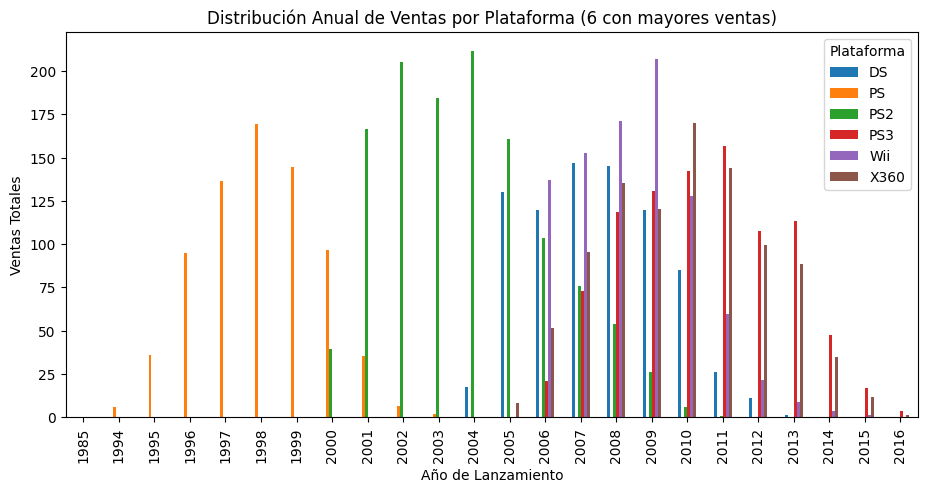

In [56]:
#construimos una distribución basada en los datos de cada año de las plataformas con mayores ventas. 

#incluimos solo nuestro top de plataformas
games_top_platforms = games[games['platform'].isin(top_platforms)]

# Agrupamos por año y plataforma, y sumamos las ventas
annual_sales = games_top_platforms.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Creamos un gráfico de la distribución anual de ventas
annual_sales.plot(kind='bar', figsize=(11, 5))
plt.title('Distribución Anual de Ventas por Plataforma (6 con mayores ventas)')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales')
plt.legend(title='Plataforma')
plt.show()


In [57]:
#Identificamos las plataformas que fueron populares pero que ya no tienen ventas

# Definimos el año límite reciente para nuestro analisis (en este caso 5 años atras)
recent_year_limit = 2011

# Filtramos
recent_sales = games[games['year_of_release'] > recent_year_limit]
platforms_with_recent_sales = recent_sales['platform'].unique()

# Identificamos plataformas populares que no tienen ventas recientes
platforms_no_recent_sales = [platform for platform in top_platforms if platform not in platforms_with_recent_sales]

print("Plataformas populares sin ventas recientes:", platforms_no_recent_sales)

Plataformas populares sin ventas recientes: ['PS2', 'PS']


¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [58]:
# Calculamos la duración de las nuevas plataformas
earliest_appearances = games.groupby('platform')['year_of_release'].min()
average_new_platform_appearance = earliest_appearances.mean()

# Calculamos la duración de las antiguas plataformas
latest_appearances = games.groupby('platform')['year_of_release'].max()
average_old_platform_appearance = latest_appearances.mean()

# Calculamos la duración típica de todas las plataformas
platform_durations = latest_appearances - earliest_appearances
average_platform_duration = platform_durations.mean()

print("Aparición de las nuevas plataformas:", average_new_platform_appearance)
print("Desaparición de las antiguas plataformas:", average_old_platform_appearance)
print("Duración promedio de todas las plataformas:", average_platform_duration)


Aparición de las nuevas plataformas: 1997.6451612903227
Desaparición de las antiguas plataformas: 2005.258064516129
Duración promedio de todas las plataformas: 7.612903225806452


Los resultados que hemos obtenido indican lo siguiente:

El valor 1997.65 significa que, en promedio, las nuevas plataformas suelen aparecer en el mercado alrededor del año 1997. Mientras que en el caso de las antiguas plataformas: El valor 2005.26 indica que, en promedio, las antiguas plataformas suelen desaparecer del mercado alrededor del año 2005. 

El valor de 7.61 representa la duración promedio de todas las plataformas, es decir que en promedio cada plataforma tiene un ciclo de vida en el mercado de 7 años.

### Determinar para qué período tomamos los datos.

En base a todo el analisis que hemos realizado, lo recomendable sería trabajar con los datos a partir del año 2001 ya que desde este año la muestra de lanzamientos comienza a ser más significativa.

In [59]:
games_desde_2001 = games[games['year_of_release'] >= 2001]
games_desde_2001

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


### ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? 

In [60]:
top_platforms_1 = games_desde_2001.sort_values(by='total_sales', ascending=False).head(10)
print("Las plataformas líderes en ventas son las siguientes:")
top_platforms_1

Las plataformas líderes en ventas son las siguientes:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82


In [61]:
#PARA ANALIZAR CUALES CRECEN Y CUALES SE REDUCEN

#Agrupamos las ventas totales por plataforma y año
sales_by_year = games_desde_2001.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

#Obtenemos los primeros y últimos años de ventas para cada plataforma
first_year_sales = sales_by_year.groupby('platform').first().reset_index()
last_year_sales = sales_by_year.groupby('platform').last().reset_index()

#Combinamos los primeros y últimos años de ventas en un merge
sales_years = pd.merge(first_year_sales, last_year_sales, on='platform', suffixes=('_first', '_last'))

#Vemos si las ventas están creciendo o disminuyendo
sales_years['trend'] = sales_years.apply(lambda row: 'GROWING' if row['total_sales_last'] > row['total_sales_first'] else 'decreasing', axis=1)

print("Comparación de ventas por plataforma:")
print(sales_years[['platform', 'total_sales_first', 'total_sales_last', 'trend']])


Comparación de ventas por plataforma:
   platform  total_sales_first  total_sales_last       trend
0       3DS              63.20             15.14  decreasing
1        DC               1.07              0.04  decreasing
2        DS              17.27              1.54  decreasing
3        GB               9.24              9.24  decreasing
4       GBA              61.53              3.40  decreasing
5        GC              26.34              0.27  decreasing
6       N64               3.25              0.08  decreasing
7        PC               5.47              5.25  decreasing
8        PS              35.59              2.07  decreasing
9       PS2             166.43              0.45  decreasing
10      PS3              20.96              3.60  decreasing
11      PS4              25.99             69.25     GROWING
12      PSP               7.06              0.12  decreasing
13      PSV               4.63              4.25  decreasing
14       WS               0.28              0.2

In [62]:
growing_platforms = sales_years[sales_years['trend'] == 'GROWING']
decreasing_platforms = sales_years[sales_years['trend'] == 'decreasing']
print("Las plataformas que están creciendo son:")
print(growing_platforms['platform'])
print("Las plataformas que están disminuyendo son:")
print(decreasing_platforms['platform'])

Las plataformas que están creciendo son:
11     PS4
19    XOne
Name: platform, dtype: object
Las plataformas que están disminuyendo son:
0      3DS
1       DC
2       DS
3       GB
4      GBA
5       GC
6      N64
7       PC
8       PS
9      PS2
10     PS3
12     PSP
13     PSV
14      WS
15     Wii
16    WiiU
17    X360
18      XB
Name: platform, dtype: object


**Por lo tanto, del analisis realizado lo conveniente es elegir las siguientes plataformas como potencialmente rentables:**

PS4 (PlayStation 4)

XOne (Xbox One)

### Observacion de cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular.

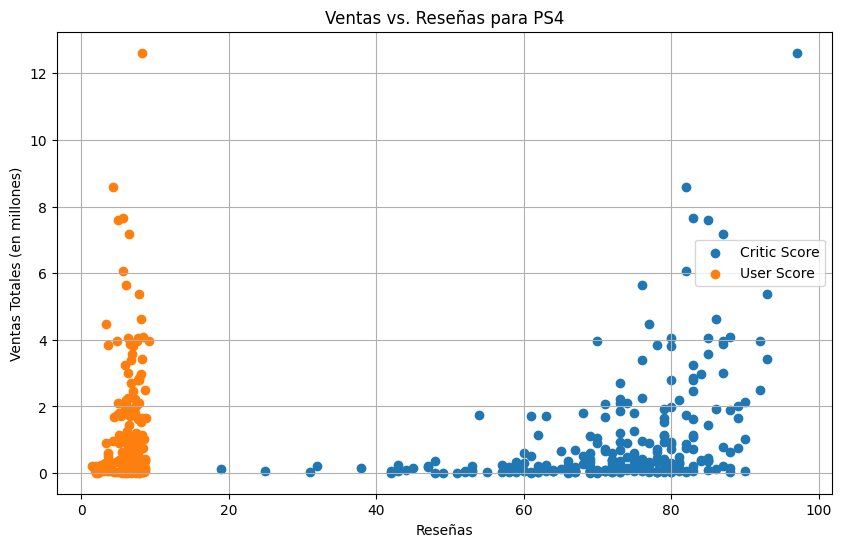

Correlación entre las reseñas de críticos y las ventas: 0.40656790206178095
Correlación entre las reseñas de usuarios y las ventas: -0.031957110204556424


In [65]:
plataforma_elegida = 'PS4'

#filtramos para incluir solo los datos de la plataforma PS4
data_plataforma = games_desde_2001[games_desde_2001['platform'] == plataforma_elegida]

#gráfico de dispersión 
plt.figure(figsize=(10, 6))
plt.scatter(data_plataforma['critic_score'], data_plataforma['total_sales'], label='Critic Score')
plt.scatter(data_plataforma['user_score'], data_plataforma['total_sales'], label='User Score')
plt.title('Ventas vs. Reseñas para ' + plataforma_elegida)
plt.xlabel('Reseñas')
plt.ylabel('Ventas Totales (en millones)')
plt.legend()
plt.grid(True)
plt.show()

#Calculamos la correlación entre las reseñas y las ventas
correlation_critic = data_plataforma['critic_score'].corr(data_plataforma['total_sales'])
correlation_user = data_plataforma['user_score'].corr(data_plataforma['total_sales'])

print("Correlación entre las reseñas de críticos y las ventas:", correlation_critic)
print("Correlación entre las reseñas de usuarios y las ventas:", correlation_user)


**Correlación entre las reseñas de críticos y las ventas de PS4:** 0.406 indica una correlación moderadamente positiva entre las reseñas de críticos y las ventas. Esto significa que, en promedio, cuando las reseñas de críticos son más altas, las ventas tienden a ser mayores. Sin embargo, la correlación no es extremadamente alta, esto quiere decir que hay muchos otros factores que también influyen en las ventas.

**Correlación entre las reseñas de usuarios y las ventas:** El valor de -0.031 indica una correlación muy débil y cercana a cero entre las reseñas de usuarios y las ventas. Por lo tanto podemos concluir que las reseñas de usuarios no afectan las ventas de la plataforma, hay otros factores mas importantes que seguro lo hacen.

### Comparar las ventas de los mismos juegos en otras plataformas.

Para este apartado decidí usar juegos que se encuentren en mas de 8 plataformas con el fin de tener un analisis con mayores datos y también delimitar la muestra a un conjunto pequeño de juegos.

In [66]:
juegos_plataformas = games_desde_2001.groupby('name')['platform'].nunique().reset_index()

juegos_varias_plataformas = juegos_plataformas[juegos_plataformas['platform'] > 8]

print("Juegos disponibles en más de 8 plataformas:")
print(juegos_varias_plataformas)


Juegos disponibles en más de 8 plataformas:
                             name  platform
2374                      FIFA 14         9
4168     LEGO Marvel Super Heroes         9
5466  Need for Speed: Most Wanted        10
6344                  Ratatouille         9


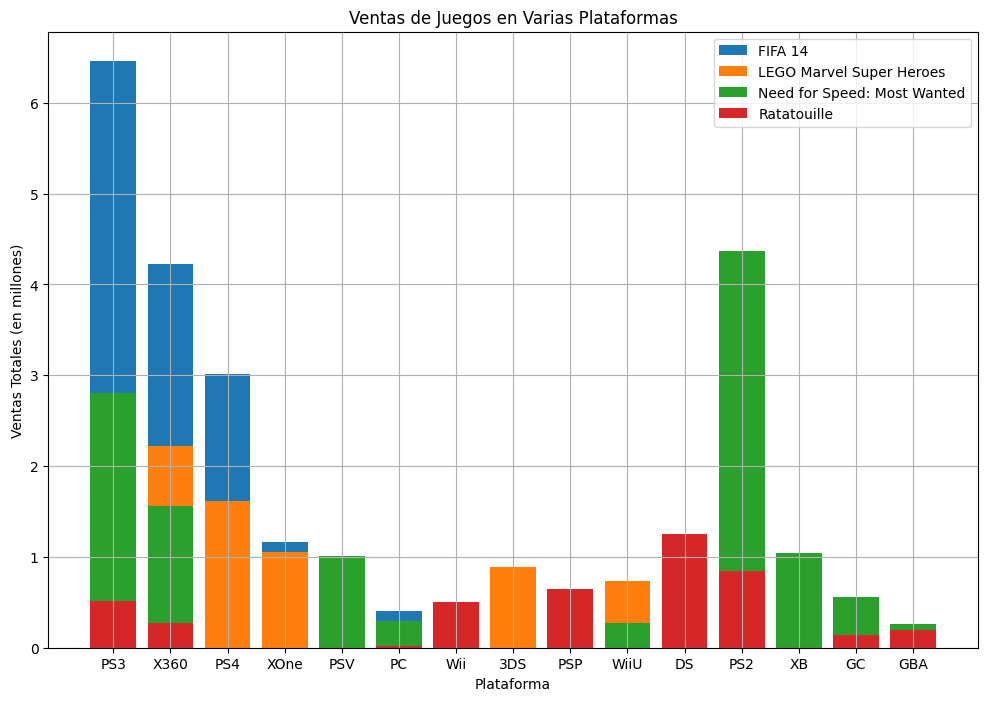

In [67]:
# Filtramos
juegos_seleccionados = ['FIFA 14', 'LEGO Marvel Super Heroes', 'Need for Speed: Most Wanted', 'Ratatouille']
data_juegos = games_desde_2001[games_desde_2001['name'].isin(juegos_seleccionados)]

# Visualizamos
plt.figure(figsize=(12, 8))
for juego in juegos_seleccionados:
    data_juego = data_juegos[data_juegos['name'] == juego]
    plt.bar(data_juego['platform'], data_juego['total_sales'], label=juego)

plt.title('Ventas de Juegos en Varias Plataformas')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (en millones)')
plt.legend()
plt.grid(True)
plt.show()

Estos resultados nos muestran claramente que el exito de un juego si varía dependiendo de la plataforma, por ejemplo en el caso del juego de FIFA 14 tiene muchas ventas en lo que respecta a PS3, X360 Y PS4, cuando en las otras plataformas las ventas son escasas respecto al mismo juego.  

Respecto a Lego podemos ver que igual se encuentra en varias plataformas pero principalmente tiene exito en x360 y PS4 seguido por XOne y WiiU.

Ocurre algo muy interensado con Ratatoulle, en este juego podemos ver una distribución mas equitativa entre algunas plataformas, demostrando que este juego a tenido un exito promedio-bajo en varias plataformas.

Finalmente en el caso de Need for Speed: Most Wanted, podemos ver que tuvo un gran numero de ventas en la PS2, siguiendo con la PS3, seguidos por la plataforma X360, y continuando en menos medidas en las plataformas PSV, XB, GC, PC, GBA y WiiU.

### Distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? 

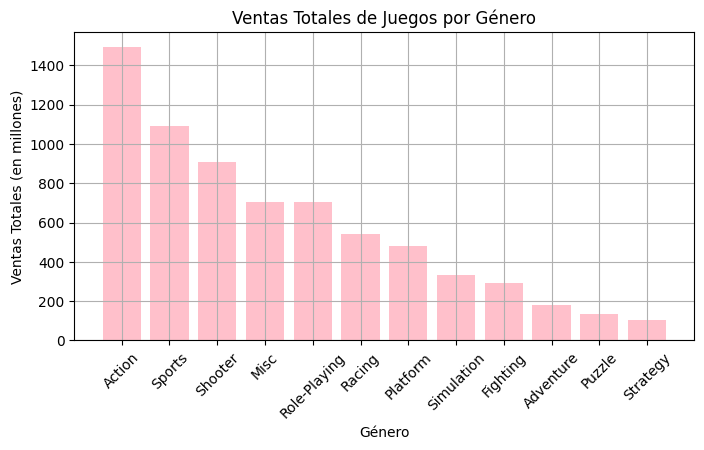

Los 5 géneros más rentables son:
0           Action
10          Sports
8          Shooter
3             Misc
7     Role-Playing
Name: genre, dtype: object


In [89]:
#Primero agrupamos por ventas y género
ventas_por_genero = games_desde_2001.groupby('genre')['total_sales'].sum().reset_index()

#Ordenamos los géneros por sus ventas totales de forma descendente
ventas_por_genero = ventas_por_genero.sort_values(by='total_sales', ascending=False)

#Visualizamos con un gráfico de barras
plt.figure(figsize=(8, 4))
plt.bar(ventas_por_genero['genre'], ventas_por_genero['total_sales'], color='pink')
plt.title('Ventas Totales de Juegos por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (en millones)')
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()

print("Los 5 géneros más rentables son:")
print(ventas_por_genero['genre'].head())

In [69]:
print("Los géneros con ventas altas son:")
print(ventas_por_genero[ventas_por_genero['total_sales'] > ventas_por_genero['total_sales'].mean()])

Los géneros con ventas altas son:
           genre  total_sales
0         Action      1492.18
10        Sports      1089.68
8        Shooter       905.87
3           Misc       702.80
7   Role-Playing       702.17


In [70]:
print("Los géneros con ventas bajas son:")
print(ventas_por_genero[ventas_por_genero['total_sales'] < ventas_por_genero['total_sales'].mean()])

Los géneros con ventas bajas son:
         genre  total_sales
6       Racing       541.06
4     Platform       478.37
9   Simulation       332.04
2     Fighting       291.64
1    Adventure       180.78
5       Puzzle       134.37
11    Strategy       106.53


Como podemos ver, los generos a nivel general con mayores ventas son: Action, Sports, Shooter, Misc, Role-Playing, esto tomando en cuenta la sumatoria de todas las ventas, mientras que los juegos con ventas más bajas son: Racing, Platform, Simulation, Fighting, Adventure, Puzzle y Strategy.

## Crea un perfil de usuario para cada región

### Para cada región (NA, UE, JP) determinaremos: Las cinco plataformas principalesy se describira las variaciones en sus cuotas de mercado de una región a otra.

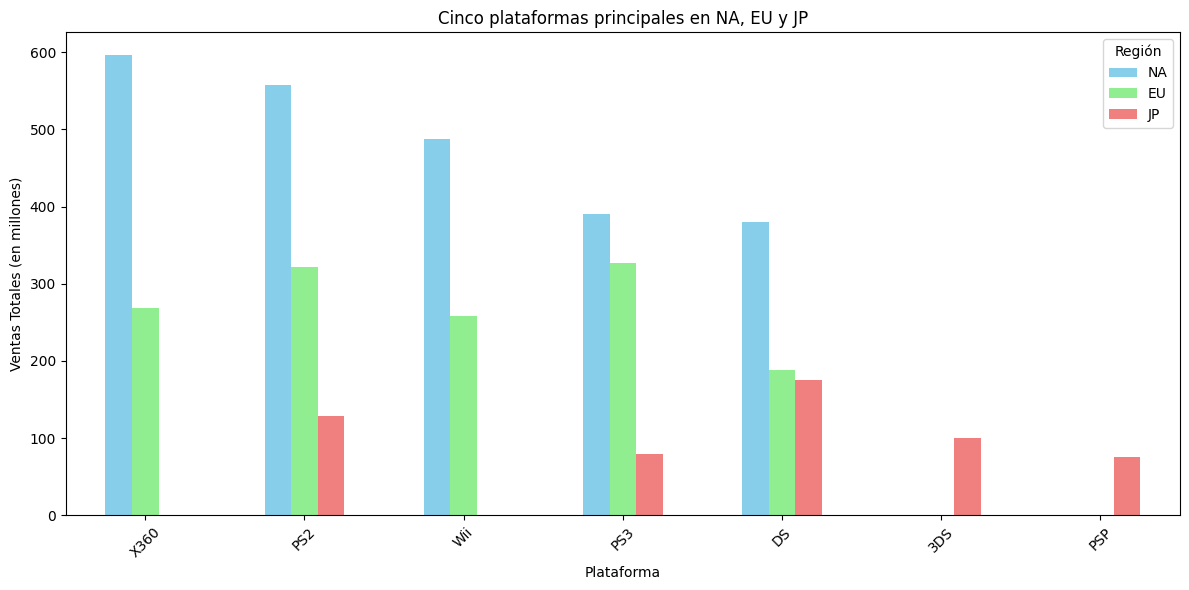

In [87]:
#Primero sacamos las 5 plataformas principales en cada región
def top_platforms_by_region(df, region, sales_column):
    top_platforms = df.groupby('platform')[sales_column].sum().sort_values(ascending=False).head(5)
    return top_platforms

na_top_platforms = top_platforms_by_region(games_desde_2001, 'NA', 'na_sales')
eu_top_platforms = top_platforms_by_region(games_desde_2001, 'EU', 'eu_sales')
jp_top_platforms = top_platforms_by_region(games_desde_2001, 'JP', 'jp_sales')

#Visualizamos
combined_top_platforms = pd.concat([na_top_platforms, eu_top_platforms, jp_top_platforms], axis=1)
combined_top_platforms.columns = ['NA', 'EU', 'JP']

colors = ['skyblue', 'lightgreen', 'lightcoral']

fig, ax = plt.subplots(figsize=(12, 6))

combined_top_platforms.plot(kind='bar', ax=ax, color=colors)
ax.set_title('Cinco plataformas principales en NA, EU y JP')
ax.set_xlabel('Plataforma')
ax.set_ylabel('Ventas Totales (en millones)')
ax.set_xticklabels(combined_top_platforms.index, rotation=45)
ax.legend(title='Región')

plt.tight_layout()
plt.show()


**VARIACIONES DEL MERCADO**

Como podemos observar, la X360 (Xbox 360) es dominante en NA con la mayor cuota de mercado, sin embaro resulta ser la menor cuota en EU y no está entre las cinco principales en JP. La PS2 (PlayStation 2) por otro lado; es consistentemente alta en todas las regiones, siendo la segunda en NA y EU, y la segunda también en JP. Respecto a la plataforma Wii, esta se eucnetra fuertemente presente en NA y EU, pero no está entre las cinco principales en JP. La PS3 (PlayStation 3) por otra parte, lidera en EU, es tercera en NA, y cuarta en JP. El DS (Nintendo DS) esta en quinta posición en NA, quinta en EU, pero lidera en JP. y Finalmente respecto a 3DS (Nintendo 3DS) y PSP (PlayStation Portable):Ambos son significativos en JP, pero no aparecen en las cinco principales ni en NA o en EU.


*En conclusión:* 

*NA: Preferencia por Xbox 360, con PlayStation y Nintendo también bien representadas.*

*EU: Dominio de las consolas PlayStation, con la Xbox 360 y Wii también populares.*

*JP: Fuerte preferencia por consolas portátiles de Nintendo y Sony, reflejando una tendencia diferente en las preferencias de los consumidores japoneses.*

<u>Estas variaciones en las cuotas de mercado reflejan las diferencias regionales en preferencias de los consumidores, por lo que deberemos tomar esto muy en cuenta para las estrategias de marketing que vayamos a implementar, basandonos en las diferencias de cada región</u>.

### Para cada región (NA, UE, JP) determinare: Los cinco géneros principales. 

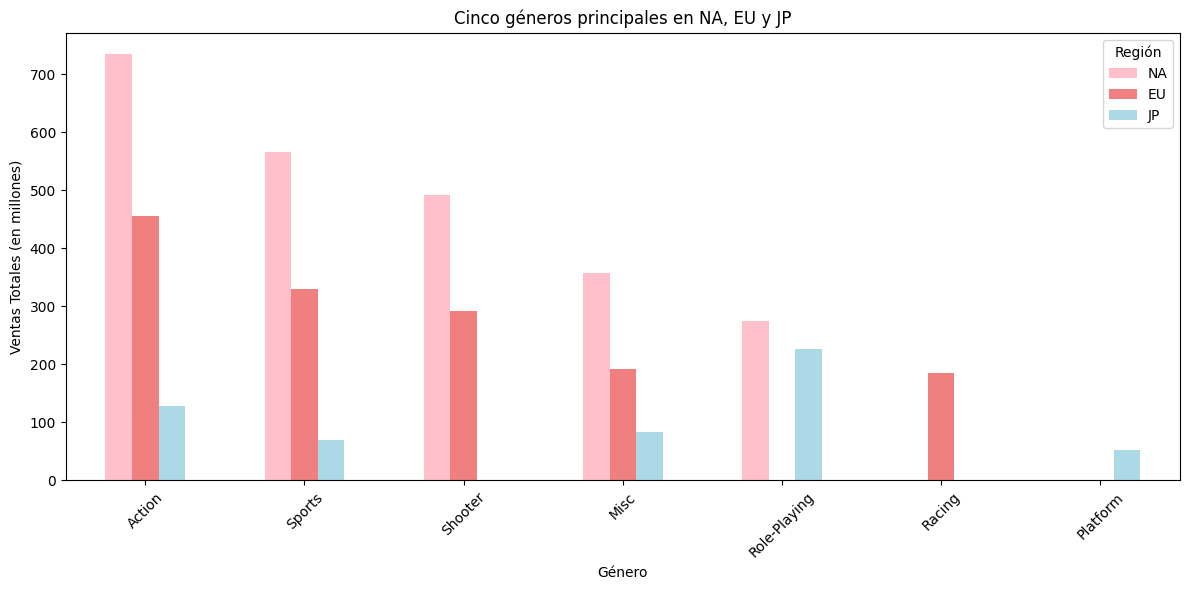

In [85]:
#Función para sacar los 5 géneros principales en cada región
def top_genres_by_region(df, region, sales_column):
    top_genres = df.groupby('genre')[sales_column].sum().sort_values(ascending=False).head(5)
    return top_genres

na_top_genres = top_genres_by_region(games_desde_2001, 'NA', 'na_sales')
eu_top_genres = top_genres_by_region(games_desde_2001, 'EU', 'eu_sales')
jp_top_genres = top_genres_by_region(games_desde_2001, 'JP', 'jp_sales')

#Visualizamos

combined_top_genres = pd.concat([na_top_genres, eu_top_genres, jp_top_genres], axis=1)
combined_top_genres.columns = ['NA', 'EU', 'JP']

colors = ['pink', 'lightcoral', 'lightblue']

fig, ax = plt.subplots(figsize=(12, 6))

combined_top_genres.plot(kind='bar', ax=ax, color=colors)
ax.set_title('Cinco géneros principales en NA, EU y JP')
ax.set_xlabel('Género')
ax.set_ylabel('Ventas Totales (en millones)')
ax.set_xticklabels(combined_top_genres.index, rotation=45)
ax.legend(title='Región')

plt.tight_layout()
plt.show()


**Diferencias en los Géneros Principales por Región**
Después del analisis que hemos realizado en la celda anterior, podemos observar diferencias notables en las preferencias de los jugadores, siendo estas las siguientes:

en América del Norte, los juegos de acción son los más populares, seguidos por los juegos de deportes y los shooters. La categoría Misc, también tiene una fuerte presencia terminando con los juegos de rol (Role-Playing) con menor popularidad pero igual dentro de su top5.

En Europa, los juegos de acción también lideran el mercado, pero con una diferencia menor en comparación con América del Norte. Los juegos de deportes y shooters siguen siendo populares. La categoría Misc también aparece, pero en menor proporción. Una diferencia notable es la presencia de los juegos de carreras (Racing) entre los cinco géneros principales en Europa.

Finalmente en Japón, los juegos de rol son los más populares, esto podría reflejar la fuerte tradición y popularidad de este género en el mercado japonés. Los juegos de acción siguen en segundo lugar, pero con ventas menores en comparación con los juegos de rol. La categoría Misc es también popular. Los juegos de deportes son menos populares en Japón comparados con NA y EU. Una diferencia notable es la presencia de juegos de plataformas (Platform) entre los cinco principales en Japón.

Conclusiones
NA y EU: Preferencias similares con juegos de acción, deportes y shooters liderando. La principal diferencia es la presencia de juegos de carreras en Europa.
JP: Preferencias distintas con una fuerte inclinación hacia los juegos de rol y plataformas, mientras que los shooters no son tan populares.

<u>Estas diferencias respecto a los generos en cada region deberán ser consideradas para las estrategias de marketing que vayamos a implementar en un futuro</u>.

### Para cada región (NA, UE, JP) determinaré: Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

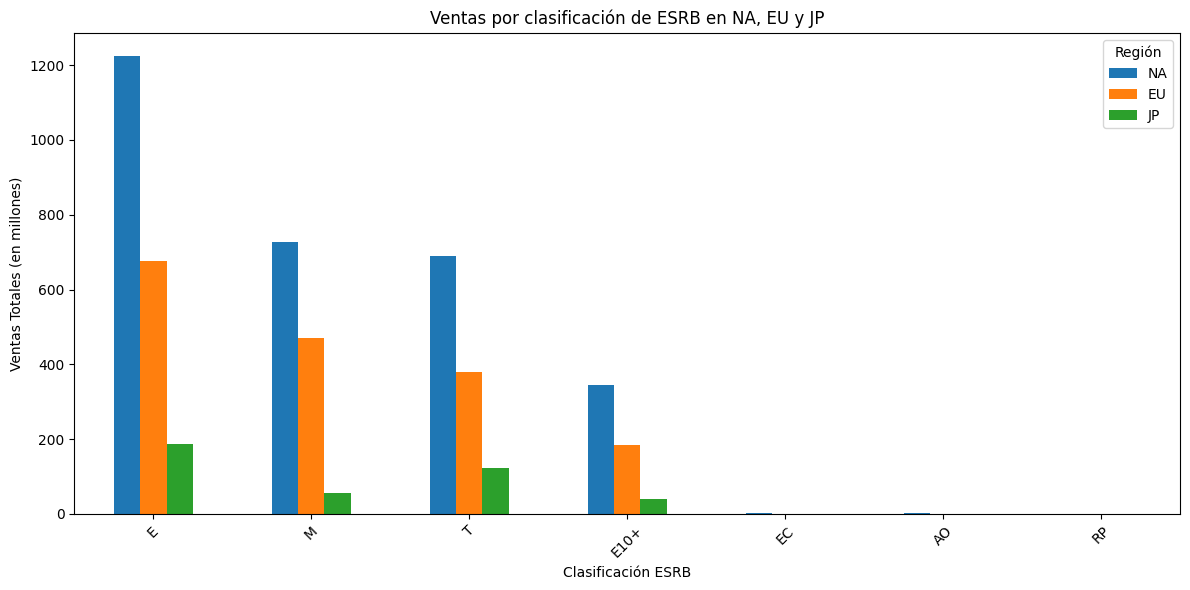

In [88]:
# Sacamos la ventas por clasificación de ESRB en cada región
def sales_by_esrb_rating(df, region, sales_column):
    sales_by_rating = df.groupby('rating')[sales_column].sum().sort_values(ascending=False)
    return sales_by_rating

na_sales_by_rating = sales_by_esrb_rating(games_desde_2001, 'NA', 'na_sales')
eu_sales_by_rating = sales_by_esrb_rating(games_desde_2001, 'EU', 'eu_sales')
jp_sales_by_rating = sales_by_esrb_rating(games_desde_2001, 'JP', 'jp_sales')

# Visualizamos 
combined_sales_by_rating = pd.concat([na_sales_by_rating, eu_sales_by_rating, jp_sales_by_rating], axis=1)
combined_sales_by_rating.columns = ['NA', 'EU', 'JP']

fig, ax = plt.subplots(figsize=(12, 6))

combined_sales_by_rating.plot(kind='bar', ax=ax)
ax.set_title('Ventas por clasificación de ESRB en NA, EU y JP')
ax.set_xlabel('Clasificación ESRB')
ax.set_ylabel('Ventas Totales (en millones)')
ax.set_xticklabels(combined_sales_by_rating.index, rotation=45)
ax.legend(title='Región')

plt.tight_layout()
plt.show()


Al observar los resultados obtenidos anteriormente, podemos hacer las siguientes observaciones:

En América del Norte, las ventas más altas son para juegos que tienen clasificación "E" (para todos los públicos), seguidas por juegos clasificados como "M" (maduros) y "T" (adolescentes), por lo tanto esto nos deja ver que que los juegos dirigidos a un público más amplio o general tiene mas ventas que los juegos de otras clasificaciones. En Europa ocurre algo similar a NA, las ventas más altas son para juegos para todo público "E", seguidos por "M" y "T". Respecto a Japón, podemos observar que las ventas más altas son para juegos clasificados como "E" y "T", y los juegos con clasificación "M" en cambio tiene ventas significativamente menores. Esto nos indica que en Japón, los juegos dirigidos a un público más joven (clasificaciones "E" y "T") tienen una demanda más alta en comparación con los juegos para un público más maduro.

## Prueba de hipótesis:

### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [78]:
# Filtramos el DataFrame para obtener solo las calificaciones de los usuarios para Xbox One y PC
xbox_one_scores = games_desde_2001[games_desde_2001['platform'] == 'XOne']['user_score'].dropna()
pc_scores = games_desde_2001[games_desde_2001['platform'] == 'PC']['user_score'].dropna()

# Probamos la hipótesis
t_statistic, p_value = ttest_ind(xbox_one_scores, pc_scores, equal_var=False)

alpha = 0.05

if p_value < alpha:
    print("Rechazamos la hipótesis nula: las calificaciones promedio de los usuarios para Xbox One y PC si son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: no hay suficiente evidencia para afirmar que las calificaciones promedio son diferentes.")


Rechazamos la hipótesis nula: las calificaciones promedio de los usuarios para Xbox One y PC si son diferentes.


### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes. 

In [77]:
# Filtramos el DataFrame para obtener solo las calificaciones de los usuarios para los géneros de Acción y Deportes
accion_scores = games_desde_2001[games_desde_2001['genre'] == 'Action']['user_score'].dropna()
deportes_scores = games_desde_2001[games_desde_2001['genre'] == 'Sports']['user_score'].dropna()

# Probamos la hipótesis
t_statistic, p_value = ttest_ind(accion_scores, deportes_scores, equal_var=False)

alpha = 0.05  

if p_value < alpha:
    print("Rechazamos la hipótesis nula: las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: no hay suficiente evidencia para afirmar que las calificaciones promedio son diferentes.")


No podemos rechazar la hipótesis nula: no hay suficiente evidencia para afirmar que las calificaciones promedio son diferentes.


Teniendo en cuenta que estas son mis hipotesis:

Hipótesis nula: Las calificaciones promedio de los usuarios para los géneros proporcionados son iguales.
Hipótesis alternativa: Las calificaciones promedio de los usuarios para los géneros proporcionados son diferentes.

El criterio que usé para determinar las hipótesis en ambos casos fue un test de hipótesis de comparación de medias, el test t de Student, ya que con esto puedo evaluar si hay una diferencia notable entre las calificaciones promedio de usuarios para los géneros en cada caso. Este criterio lo usé porque estamos comparando dos muestras que son independientes entre ellas (las calificaciones de los usuarios para dos géneros diferentes) y todo esto con el fin de saber si hay una diferencia significativa en las medias de estas muestras. 

## Conclusiones

1. Para iniciar con este proyecto integrado fue importante en primer lugar familiarizarme con los datos con los que iba a trabajar, para esto se importaron en primer lugar las librerias que consideré necesarias y luego se cargaron los datos con el fin de analizar la información general de los mismos, al dataframe inicialmente le di el nombre de "games" y luego de cargar la informacion, se pudo ver que estaba compuesto por 11 columnas muy importantes:Name, Platform, Year_of_Release, Genre, NA_sales, EU_sales, JP_sales, Other_sales, Critic_Score, User_Score y Rating.


2. Luego de revisar esto se realizó un cambio en los nombres de las columnas poniendo todo el minúscula, esto constituye una buena practica dentro de nuestro tratamiento de datos y facilita el analisis posterior, ademas de esto modidique el tipo de datos en lo que crei pertinente y realicé las tareas de preprocesamiento de datos respecto a valores ausentes según como mejor se consideró.


3. Posteriormente y luego de la fase anterior se procedió al analisis de los datos mediante el cual respondimos a distintas interrogatorias y usamos varios graficos para visualizar nuestros descubrimientos y resultados, esto facilita el entendimiento de las distintas conclusiones que hemos ido desarrollando respecto a ventas, generos, desarrollo y desaparición de plataformas, lanzamiento de juegos por añor, entre otras cosas, para este analisis es importante acotar que delimitamos los datos en el dataframe games_desde_2001 con el fin de ignorar aquellos años que no nos ofrecian información significativa para trabajar.


4. Continuando, crearon perfiles de usuario para cada región, esto quiere decir que quisimos por medio del analisis de nuestros datos, entender mejor tanto las ventas como las preferencias de los usuarios de estas tres regiones respecto a plataformas y juegos todo esto con el fin de conocer mejor a nuestros consumidores y tener la información necesaria para planificar próximas campañas puclicitarias.


5. Finalmente realizamos dos pruebas de hipotesis y asi enriquecimos más el presente proyecto para la TIENDA ONLINE ICE.

Como podemos ver se realizo un analisis utilizando varias habilidades adquiridas, se abarco carga de datos, preprocesamiento, analisis y explicación de resultados, pruebas de hipótesis y conclusiones generales.  Agradezco por la oportunidad de trabajar en este proyecto y quedo atenta a proporcionar cualquier aclaración adicional o necesaria.


Micaela Lastra S.